# 04. 분류하는 뉴런을 만듭니다. - 이진 분류

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
cancer = load_breast_cancer()

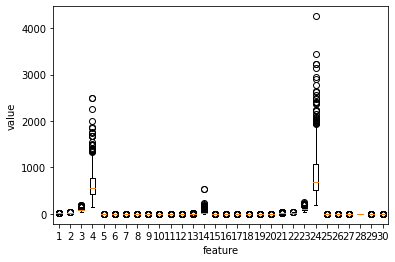

In [6]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [7]:
x = cancer.data
y = cancer.target

In [13]:
# stratify : 클래스 비율을 동일하게 만드는 파라미터.

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state=42)

In [16]:
class LogisticNeuron:
  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self, x):
    z = np.sum(x*self.w)+self.b
    return z

  def backprop(self, x, err):
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad

  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        z = self.forpass(x_i)
        a = self.activation(z)
        err = -(y_i - a)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad
        self.b -= b_grad
  
  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.activation(np.array(z))
    return a > 0.5

In [17]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

<ipython-input-16-367ae03cbee8>:28: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


In [18]:
np.mean(neuron.predict(x_test) == y_test)

<ipython-input-16-367ae03cbee8>:28: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


0.8245614035087719

In [22]:
class SingleLayer:
  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self, x):
    z = np.sum(x*self.w)+self.b
    return z

  def backprop(self, x, err):
    w_grad = x*err
    b_grad = 1*err
    return w_grad, b_grad

  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= w_grad
        self.b -= b_grad
        # a에 np.log를 적용해주어야 하므로 값 클리핑.
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))

  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

In [23]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

<ipython-input-22-94a2e95a51aa>:35: RuntimeWarning: overflow encountered in exp
  a = 1 / (1 + np.exp(-z))


0.9385964912280702

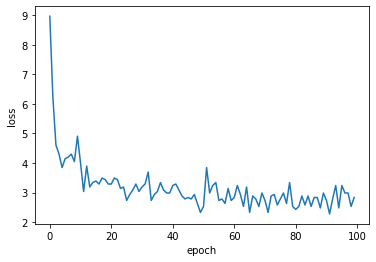

In [25]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 04-7 사이킷런으로 로지스틱 회귀 수행

In [31]:
# tol : 로지스틱 값이 tol 지정한 값만큼 감소되지 않으면 반복 중단.
sgd = SGDClassifier(loss = 'log', max_iter = 100, tol = 1e-3, random_state = 42)
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [32]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [33]:
y_test[0:10]

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0])